### Logistic Regression for Multi Class Classification

One vs Rest | One vs All

Extends Binary Classifiers to Multi Class Problems

Train One Classifier per Class ( One Class is Treated as Positive and others are Treated as Negative )

e.g. Data Set has 4 Classes ( The Digits 0,1,2 and 3 )

One vs Rest Approach :

1. digit 0 vs digits 1,2 and 3

2. digit 1 vs digits 0,2 and 3

3. digit 2 vs digits 0,1 and 3

4. digit 3 vs digits 0,1 and 2

Model that Predicts the Highest Class Probability is the Predicted Class

### Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('../Data/Digits.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0


### Visualize Each Digit

In [3]:
features = df.columns[:-1]
features

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63'],
      dtype='object')

In [4]:
image = df.loc[0, features].values
image

array([ 0,  0,  5, 13,  9,  1,  0,  0,  0,  0, 13, 15, 10, 15,  5,  0,  0,
        3, 15,  2,  0, 11,  8,  0,  0,  4, 12,  0,  0,  8,  8,  0,  0,  5,
        8,  0,  0,  9,  8,  0,  0,  4, 11,  0,  1, 12,  7,  0,  0,  2, 14,
        5, 10, 12,  0,  0,  0,  0,  6, 13, 10,  0,  0,  0], dtype=int64)

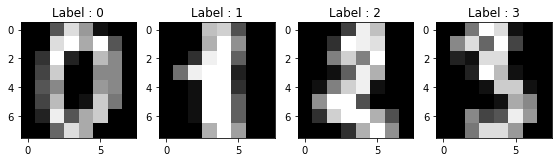

In [5]:
plt.figure(figsize=(12,4))
for index in range(0,4):
    plt.subplot(1,5, 1 + index)
    image_values = df.loc[index, features].values
    image_labels = df.loc[index, 'label']
    plt.imshow(image_values.reshape(8,8), cmap='gray')
    plt.title(f'Label : {image_labels}')

### Splitting Data into Train and Test Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[features], 
                                                    df['label'], 
                                                    random_state=0)

### Standardize the Data 

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [8]:
clf = LogisticRegression(solver='liblinear', 
                         multi_class='ovr', 
                         random_state=0)
clf.fit(X_train, y_train)
print(f'Train Score : {clf.score(X_train, y_train)*100:.2f}%')
print(f'Test Score : {clf.score(X_test, y_test)*100:.2f}%')

Train Score : 100.00%
Test Score : 100.00%


In [9]:
print(f'Intercept : {clf.intercept_}')

Intercept : [-2.712674   -3.54379096 -3.18367757 -2.623974  ]


In [10]:
print(f'Classes : {clf.classes_}')

Classes : [0 1 2 3]


### Prediction for One Observation

In [11]:
print(f'Probability : {clf.predict_proba(X_test[0:1])[0]*100}')

Probability : [ 0.18312334 98.36896638  0.53637757  0.9115327 ]


Probability for Class 1 is Maximum 

In [12]:
clf.predict(X_test[0:1])

array([1], dtype=int64)